In [1]:
from IPython.display import display, HTML
from IPython.display import display, Markdown
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pyspedas
import numpy as np
import matplotlib . pyplot as plt
params = { 'tex . usetex ': True }
import matplotlib . dates as md

from pytplot import get_data, tkm2re
from pyspedas import time_string , time_double , mms
from datetime import datetime

In [3]:
start_time = '2024-05-11/00:00:00'
end_time   = '2024-05-11/24:00:00'

# Separar os parâmetros de entrada  data"/"hora
ttext = start_time.split('/') 

probe = ['1']   #'1','2','3','4'
datatype=['dis-moms','des-moms']
t_clip = 'True'

data_rate_fgm = 'brst'
data_rate_fpi = 'brst'

num = len(probe)

cgeo = 'gse'

In [4]:
var_MEC = ['mms'+i+'_mec_r_'+cgeo for i in probe]

var_FPI = ['mms1_dis_numberdensity_'+data_rate_fpi, 'mms1_des_numberdensity_'+data_rate_fpi,
           'mms1_dis_bulkv_'+cgeo+'_'+data_rate_fpi, 'mms1_des_bulkv_'+cgeo+'_'+data_rate_fpi,
           'mms1_dis_energyspectr_omni_'+data_rate_fpi, 'mms1_des_energyspectr_omni_'+data_rate_fpi,
           'mms1_dis_tempperp_'+data_rate_fpi, 'mms1_dis_temppara_'+data_rate_fpi,
           'mms1_des_tempperp_'+data_rate_fpi,'mms1_des_temppara_'+data_rate_fpi]

var_FGM = ['mms'+i+'_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2' for i in probe]

var_EDP = ['mms'+i+'_edp_dce_'+cgeo+'_'+data_rate_fpi+'_l2' for i in probe] 

## Carregamentos

In [5]:
pyspedas.mms.mec(trange=[start_time,end_time] , probe=probe, 
                 varnames = var_MEC  , time_clip=t_clip)

06-Sep-24 13:18:19: Loading pydata\mms1\mec\srvy\l2\epht89q\2024\05\mms1_mec_srvy_l2_epht89q_20240511_v2.2.0.cdf


['mms1_mec_r_gse']

In [6]:
pyspedas.mms.fgm(trange= [start_time,end_time] , 
                 probe= probe,  
                 varnames = var_FGM, 
                 data_rate= data_rate_fgm ,
                 time_clip=t_clip)

06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511032323_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511034043_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511041113_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511042303_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511042503_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511090253_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511091123_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511091823_v5.455.0.cdf
06-Sep-24 13:18:20: Loading pydata\mms1\fgm\brst\l2\2024\05\11\mms1_fgm_brst_l2_20240511093153_v5.455.0.cdf
06-Sep-24 13:18:20: Loading 

['mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot']

In [7]:
pyspedas.mms.fpi(trange= [start_time, end_time], 
                 probe= probe,
                 datatype= datatype, 
                 varnames= var_FPI, 
                 data_rate= data_rate_fpi, time_clip=t_clip)

06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511105113_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511105313_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511110503_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511110723_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511110953_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511111213_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511111443_v3.4.0.cdf
06-Sep-24 13:18:22: Loading pydata\mms1\fpi\brst\l2\dis-moms\2024\05\11\mms1_fpi_brst_l2_dis-moms_20240511111703_v3.4.0.cdf
06-Sep-2

['mms1_des_numberdensity_brst',
 'mms1_des_bulkv_gse_brst',
 'mms1_des_energyspectr_omni_brst',
 'mms1_des_tempperp_brst',
 'mms1_des_temppara_brst',
 'mms1_dis_numberdensity_brst',
 'mms1_dis_bulkv_gse_brst',
 'mms1_dis_energyspectr_omni_brst',
 'mms1_dis_tempperp_brst',
 'mms1_dis_temppara_brst',
 'mms1_des_errorflags_brst_moms',
 'mms1_des_compressionloss_brst_moms',
 'mms1_dis_errorflags_brst_moms',
 'mms1_dis_compressionloss_brst_moms']

In [8]:
#pyspedas.mms.edp(trange=[start_time,end_time], varnames = var_EDP, probe=probe)

## Extração dos dados

In [9]:
t1_FGM, b1 = get_data('mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2')

In [10]:
t1_FPI_di, di1 = get_data('mms1_dis_numberdensity_'+data_rate_fpi)
t1_FPI_de, de1 = get_data('mms1_des_numberdensity_'+data_rate_fpi)


t1_FPI_vi, vi1 = get_data('mms1_dis_bulkv_'+cgeo+'_'+data_rate_fpi)
t1_FPI_ve, ve1 = get_data('mms1_des_bulkv_'+cgeo+'_'+data_rate_fpi)

t1_FPI_i , data1_i, energy1_i= get_data('mms1_dis_energyspectr_omni_'+data_rate_fpi)

## Temperatura dos íons e dos elétrons para MMS1
t1_FPI_epr, Tepr = get_data('mms1_des_tempperp_'+data_rate_fpi)
t1_FPI_epl, Tepl = get_data('mms1_des_temppara_'+data_rate_fpi)

t1_FPI_ipr, Tipr = get_data('mms1_dis_tempperp_'+data_rate_fpi)
t1_FPI_ipl, Tipl = get_data('mms1_dis_temppara_'+data_rate_fpi)
    
dis_T = (Tipl + 2*Tipr)/3.0    # Está em eV
des_T = (Tepl + 2*Tepr)/3.0   # Está em eV

In [11]:
t1_FPI_pos  , pos1 = get_data('mms1_mec_r_gse')

km_in_re = 6371.2

pos1_r = pos1/km_in_re

pos1_r = np.round(pos1_r,3)
pos1_r

array([[ 11.588, -18.13 ,  -5.048],
       [ 11.587, -18.125,  -5.046],
       [ 11.587, -18.119,  -5.044],
       ...,
       [ -2.937, -11.408,  -5.037],
       [ -2.935, -11.418,  -5.041],
       [ -2.933, -11.429,  -5.045]])

### Ajuste de tempo

In [12]:
# Ajuste dos valores de tempo para o plot (Não mexer após a primeira iteração)

# Campo magnético
t1_b = md.date2num(time_string(t1_FGM))

# Dados de plasma
t1_di  = md.date2num(time_string(t1_FPI_di))
t1_de  = md.date2num(time_string(t1_FPI_de))

t1_vi  = md.date2num(time_string(t1_FPI_vi))
t1_ve  = md.date2num(time_string(t1_FPI_ve))

t1_en = md.date2num(time_string(t1_FPI_i)) 

t_dis = md.date2num(time_string(t1_FPI_ipr))
t_des = md.date2num(time_string(t1_FPI_epr))

# Dados de posição

t_p1 = md.date2num(time_string(t1_FPI_pos))

## Finalização  

In [13]:
# Intervalo Total do plot
IT1 = '10:51:30'
IT2 = '10:56:00'

# Primeiro par de barras verticais (inferior e superior)
IB11 = '09:19:26'
IB12 = '09:19:36'

# Segundo par de barras verticais (inferior e superior)
IB21 = '09:20:47'
IB22 = '09:20:57'

#######################################################################################
tb_inf = md.date2num(datetime.strptime(start_time[0:11]+IT1, '%Y-%m-%d/%H:%M:%S')) 
tb_sup = md.date2num(datetime.strptime(end_time[0:11]+IT2, '%Y-%m-%d/%H:%M:%S')) 

tb_i1 = md.date2num(datetime.strptime(start_time[0:11]+ IB11, '%Y-%m-%d/%H:%M:%S')) 
tb_s1 = md.date2num(datetime.strptime(end_time[0:11]+ IB12, '%Y-%m-%d/%H:%M:%S')) 

tb_i2 = md.date2num(datetime.strptime(start_time[0:11]+ IB21, '%Y-%m-%d/%H:%M:%S')) 
tb_s2 = md.date2num(datetime.strptime(end_time[0:11]+ IB22, '%Y-%m-%d/%H:%M:%S')) 

In [14]:
seconds = md.SecondLocator(interval = 60)   
minutes = md.MinuteLocator(interval = 1)  
hour    = md.HourLocator(interval = 1)  
#day     = md.DayLocator(interval = 1)

formatter = md.DateFormatter('%H:%M') #'%H:%M'

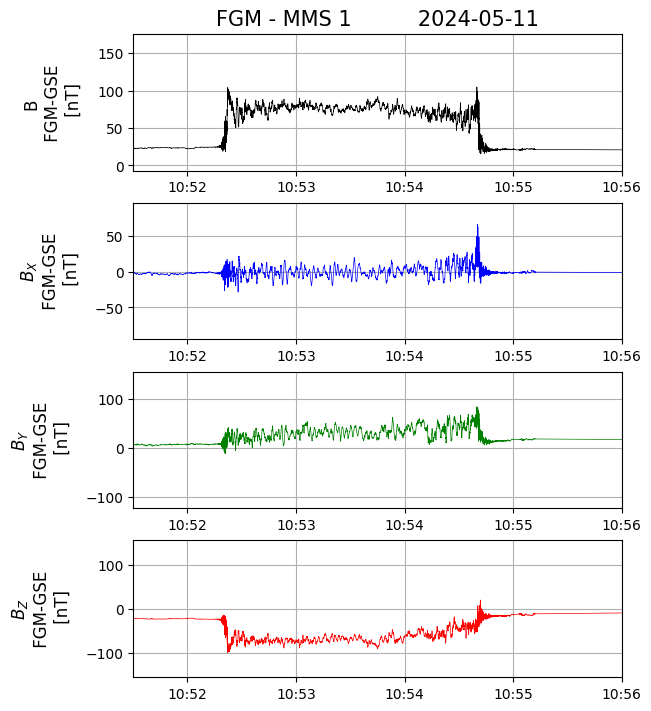

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(6.4, 7), layout='constrained')

axs[0].set_title('FGM - MMS 1'+10*' '+ttext[0],size = 15)

axs[0].set_ylabel('B \n FGM-GSE \n [nT]', labelpad=10,size = 12)
axs[0].plot(t1_b, b1[:,3],lw = 0.5, color='black',label= r'$B_T$')

axs[1].set_ylabel(r'$B_X$'+'\n FGM-GSE \n [nT]', labelpad=10,size = 12)
axs[1].plot(t1_b, b1[:,0],lw = 0.5, color='blue' ,label= r'$B_X$')

axs[2].set_ylabel(r'$B_Y$'+'\n FGM-GSE \n [nT]', labelpad=10,size = 12)
axs[2].plot(t1_b, b1[:,1],lw = 0.5, color='green',label= r'$B_Y$')

axs[3].set_ylabel(r'$B_Z$'+'\n FGM-GSE \n [nT]', labelpad=10,size = 12)
axs[3].plot(t1_b, b1[:,2],lw = 0.5, color='red'  ,label= r'$B_Z$')


for n in range(4):
# Eixo x
    axs[n].xaxis.set_major_locator(minutes) #axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds) #axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    axs[n].grid()
    #axs[n].legend()

#plt.savefig('MMS1_01122015_CampoMagnético_intervalo_total.png', dpi=300, bbox_inches = 'tight') 
plt.show()

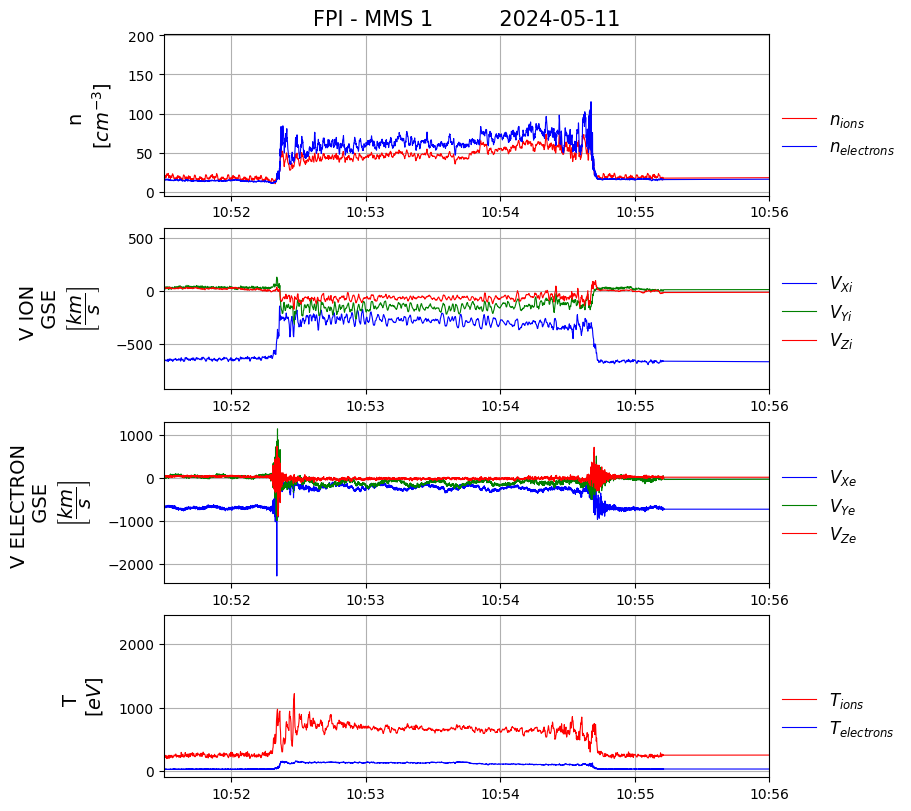

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(9, 8), layout='constrained')

axs[0].set_title('FPI - MMS 1'+10*' '+ttext[0],size = 15)

axs[0].set_ylabel('n \n' + r'$\left[ cm^{-3} \right]$', labelpad=10, size = 14)
axs[0].plot(t1_di, di1, lw = 0.8, color='red' , markersize = 2, label= r'$n_{ions}$')
axs[0].plot(t1_de, de1, lw = 0.8, color='blue', markersize = 2, label= r'$n_{electrons}$')
#axs[0].set_yscale('log')   

axs[1].set_ylabel('V ION \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 14)
#axs[1].plot(t1_vi, vi1,lw = 0.8 , label= r'$d_{ions}$')
axs[1].plot(t1_vi, vi1[:,0], lw = 0.8, color='blue' , markersize = 1, label= r'$V_{Xi}$')
axs[1].plot(t1_vi, vi1[:,1], lw = 0.8, color='green', markersize = 1, label= r'$V_{Yi}$')
axs[1].plot(t1_vi, vi1[:,2], lw = 0.8, color='red'  , markersize = 1, label= r'$V_{Zi}$')
#axs[1].plot(t1_vi, vi1[:,2],'-o',lw = 0.8, color='red'  , markersize = 1, label= r'$V_{Zi}$')
       

axs[2].set_ylabel('V ELECTRON \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 14)
#axs[2].plot(t1_ve, ve1,lw = 0.8 , label= r'$d_{electrons}$')
axs[2].plot(t1_ve, ve1[:,0],lw = 0.8, color='blue' , markersize = 2, label= r'$V_{Xe}$')
axs[2].plot(t1_ve, ve1[:,1],lw = 0.8, color='green', markersize = 2,label= r'$V_{Ye}$')
axs[2].plot(t1_ve, ve1[:,2],lw = 0.8, color='red'  , markersize = 2,label= r'$V_{Ze}$')


axs[3].set_ylabel('T \n' + r'$\left[ eV \right]$', labelpad=10, size = 14)
axs[3].plot(t_dis, dis_T, lw = 0.8, color='red' , markersize = 2, label= r'$T_{ions}$')
axs[3].plot(t_des, des_T, lw = 0.8, color='blue', markersize = 2, label= r'$T_{electrons}$')


for n in range(4):
# Eixo x
    axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    axs[n].grid()
    axs[n].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':12})
    
#plt.savefig('MMS1_01122015_DadosFPIintervalo_total.png', dpi=300, bbox_inches = 'tight') 

In [17]:
from matplotlib.colors import LogNorm

In [18]:
v_t = np.array( [np.linalg.norm(vi1[i,:])  for i in range(len(vi1)) ] )

06-Sep-24 13:18:35: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


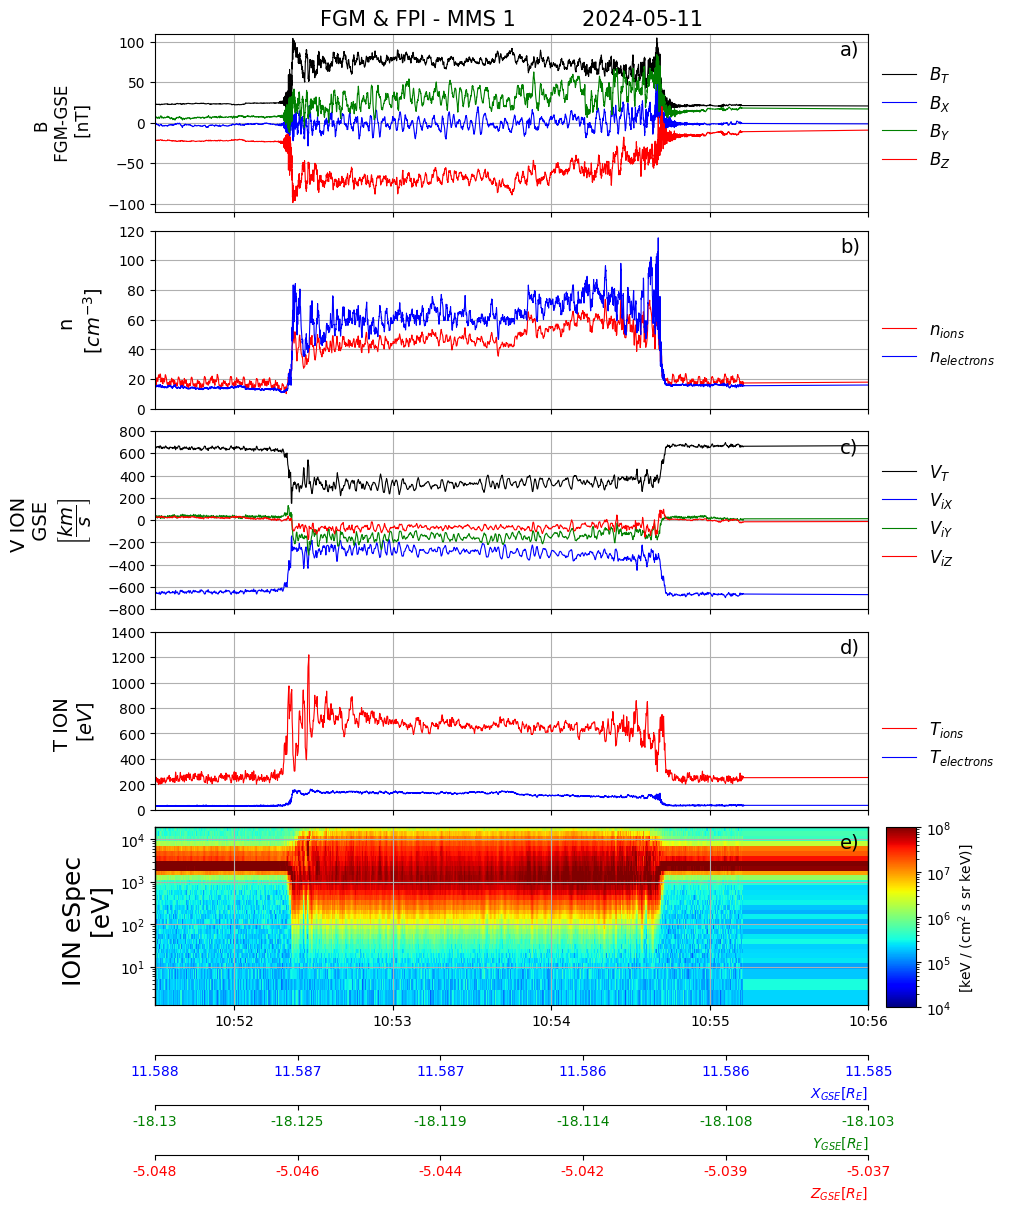

In [19]:
fig, axs = plt.subplots(5, 1, figsize=(10, 12), gridspec_kw={'hspace': 0.02}, sharex=True, layout='constrained')

axs[0].set_title('FGM & FPI - MMS 1'+10*' '+ttext[0],size = 15)

axs[0].set_ylabel('B \n FGM-GSE \n [nT]', labelpad=10,size = 12)
axs[0].plot(t1_b, b1[:,3],lw = 0.8, color='black',label= r'$B_T$')
axs[0].plot(t1_b, b1[:,0],lw = 0.8, color='blue' ,label= r'$B_X$')
axs[0].plot(t1_b, b1[:,1],lw = 0.8, color='green',label= r'$B_Y$')
axs[0].plot(t1_b, b1[:,2],lw = 0.8, color='red'  ,label= r'$B_Z$')
axs[0].set_yticks(np.arange(-100, 110.1, 50))
axs[0].set_ylim([-110.1,110.1])

axs[1].set_ylabel('n \n' + r'$\left[ cm^{-3} \right]$', labelpad=10, size = 14)
axs[1].plot(t1_di, di1, lw = 0.8, color='red' , label= r'$n_{ions}$')
axs[1].plot(t1_de, de1, lw = 0.8, color='blue', label= r'$n_{electrons}$')
axs[1].set_yticks(np.arange(0., 121, 20))
axs[1].set_ylim([-0.1,120])

axs[2].set_ylabel('V ION \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 14)
axs[2].plot(t1_vi, v_t     ,lw = 0.8, color='black', label= r'$V_{T}$')
axs[2].plot(t1_vi, vi1[:,0],lw = 0.8, color='blue' , label= r'$V_{iX}$')
axs[2].plot(t1_vi, vi1[:,1],lw = 0.8, color='green', label= r'$V_{iY}$')
axs[2].plot(t1_vi, vi1[:,2],lw = 0.8, color='red'  , label= r'$V_{iZ}$')
axs[2].set_yticks(np.arange(-800, 800.1, 200))
axs[2].set_ylim([-800.1,800.1])

 
axs[3].set_ylabel('T ION \n'+ r'$\left[eV\right] $',labelpad=10, size = 14)    
axs[3].plot(t_dis, dis_T, lw = 0.8, color='red' , label= r'$T_{ions}$')   
axs[3].plot(t_des, des_T, lw = 0.8, color='blue', label= r'$T_{electrons}$')
axs[3].set_yticks(np.arange(0., 1401, 200))
axs[3].set_ylim([-0.1,1400])
#axs[4].set_yscale('log') 


c = axs[4].pcolor(t1_en,np.transpose(energy1_i),np.transpose(data1_i), shading='auto', norm=LogNorm(vmin=1e4, vmax=1e8), cmap='jet')
axs[4].set_yscale('log') 
axs[4].set_ylabel('ION eSpec \n [eV]', size = 18)

#axs[4].annotate('d)', xy=(0.97,0.9), xycoords='axes fraction',size=18)

cbaxes = fig.add_axes([0.88, 0.165, 0.03, 0.15]) 
fig.colorbar(c, ax = axs[4], cax = cbaxes, label = '[keV / '+ r'(cm$^2$ s sr keV)]')    

Lts = ['a', 'b', 'c', 'd', 'e']

for n in range(5):   
# Barras verticais
    #axs[n].axvline(tb_i1 , color='black',lw=1)
    #axs[n].axvline(tb_s1 , color='black',lw=1)
    
    #axs[n].axvline(tb_i2 , color='black',lw=1)
    #axs[n].axvline(tb_s2 , color='black',lw=1)
# Eixo x
    axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    axs[n].grid()
    #axs[n].legend()
    axs[n].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':12})
    axs[n].annotate(Lts[n]+')', xy=(0.96,0.88), xycoords='axes fraction',size=14)


axs2 = axs[4].twiny()
axs2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axs2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs2.spines['bottom'].set_position(('outward', 36))
axs2.set_xticklabels(pos1_r[:,0], color='blue')
axs2.set_xlabel(r'$X_{GSE}[R_E]$', loc='right', color='blue')

axs3 = axs2.twiny()
axs3.xaxis.set_ticks_position('bottom')
axs3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs3.spines['bottom'].set_position(('outward', 72))

axs3.set_xticklabels(pos1_r[:,1], color='green')
axs3.set_xlabel(r'$Y_{GSE}[R_E]$', loc='right', color= 'green')

axs4 = axs3.twiny()
axs4.xaxis.set_ticks_position('bottom')
axs4.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs4.spines['bottom'].set_position(('outward', 108))
axs4.set_xticklabels(pos1_r[:,2], color='red')
axs4.set_xlabel(r'$Z_{GSE}[R_E]$', loc='right',color='red')

    
#plt.savefig('MMS1_11052024_1050_GraficoCompletoPlasma.png', dpi=300, bbox_inches = 'tight') 
plt.show()

[left, bottom, width, height]

https://cursos.alura.com.br/forum/topico-fig-add_axes-166218

In [28]:
pos1_r

array([[ 11.588, -18.13 ,  -5.048],
       [ 11.587, -18.125,  -5.046],
       [ 11.587, -18.119,  -5.044],
       ...,
       [ -2.937, -11.408,  -5.037],
       [ -2.935, -11.418,  -5.041],
       [ -2.933, -11.429,  -5.045]])

In [30]:
pos1_r[:,2]

array([-5.048, -5.046, -5.044, ..., -5.037, -5.041, -5.045])

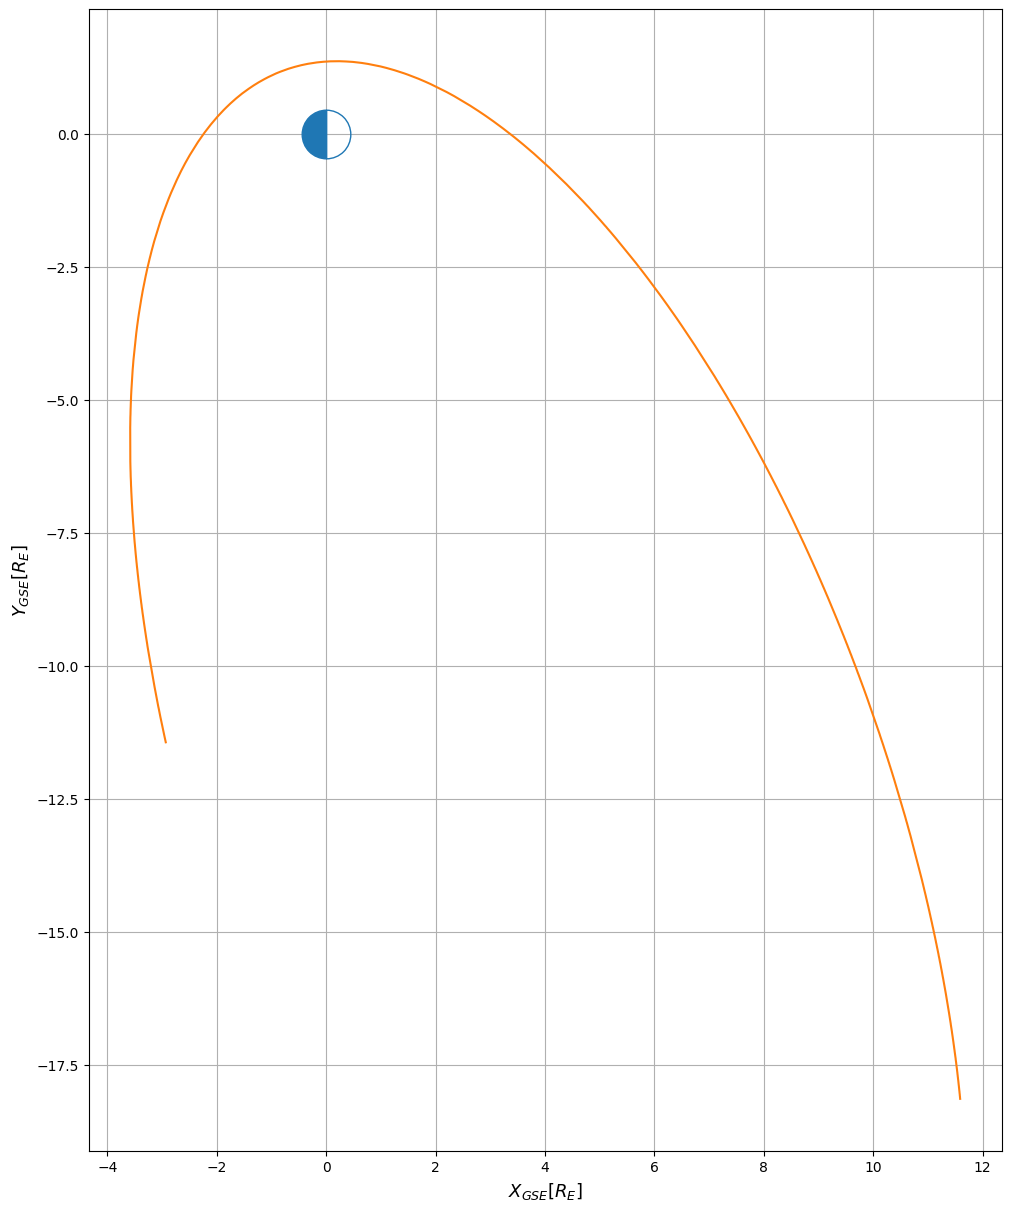

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(10, 12), layout='constrained')

#pos1_r
axs.set_xlabel(r'$X_{GSE}$'+ '[$R_{E}$]', size = 13)
axs.set_ylabel(r'$Y_{GSE}$'+ '[$R_{E}$]', size = 13)

axs.plot(0,0 , fillstyle='left', marker='o', ms='35')
axs.plot(pos1_r[:,0], pos1_r[:,1])


axs.grid()

In [32]:
zoom_ini = '2024-05-10'
zoom_fin = '2024-05-10'

newdates_zoom = [zoom_ini+' '+'16:30:00', zoom_fin+' '+'20:00:00']
newdates_zoom

tz_i = time_pos16.get_loc(newdates_zoom[0])
tz_s = time_pos16.get_loc(newdates_zoom[1])

dates_24h = [zoom_ini+' '+'00:30:00', zoom_fin+' '+'23:59:00']
t24_i     = time_pos16.get_loc(dates_24h[0])
t24_s     = time_pos16.get_loc(dates_24h[1])

NameError: name 'time_pos16' is not defined

In [ ]:
fig, axs = plt.subplots(1, 1 , gridspec_kw={'hspace': 0.5})

#plt.suptitle('Positions GOES',size = 20)

axs.set_xlabel(r'$X_{GSE}$'+ '[$R_{E}$]', size = 13)
axs.set_ylabel(r'$Y_{GSE}$'+ '[$R_{E}$]', size = 13)

#axs.plot(0,0 , fillstyle='left', marker='o', ms='35')
#axs.plot(ephe_G16[0][t_s16]/Re, ephe_G16[1][t_s16]/Re , marker="s", ms='8', mfc = 'r', label = r"GOES 16")
#axs.plot(ephe_G18[0][t_s16]/Re, ephe_G18[1][t_s16]/Re , marker="s", ms='8', mfc = 'g', label = r"GOES 18")

#axs.plot(ephe_G16[0][tz_i:tz_s+1]/Re, ephe_G16[1][tz_i:tz_s+1]/Re, ls = '-', lw = 1, color = 'r')
#axs.plot(ephe_G18[0][tz_i:tz_s+1]/Re, ephe_G18[1][tz_i:tz_s+1]/Re, ls = '-', lw = 1, color = 'g')

#24 h 
#axs.plot(ephe_G16[0][t24_i:t24_s+1]/Re, ephe_G16[1][t24_i:t24_s+1]/Re, ls = ':', lw = 0.3, color = 'r')
#axs.plot(ephe_G18[0][t24_i:t24_s+1]/Re, ephe_G18[1][t24_i:t24_s+1]/Re, ls = ':', lw = 0.3, color = 'g')

#axs.set_xticks(np.arange(-10., 11, 1))
#axs.set_yticks(np.arange(-6., 7.1, 1))
#axs.set_aspect('equal')

axs.grid()
axs.legend()